In [126]:
from alpaca_trade_api import REST
import dotenv
import os
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [6]:
dotenv.load_dotenv("../.config/.env")
_API_KEY = os.environ["API_KEY"]
_API_SECRET_KEY = os.environ["API_SECRET_KEY"]

In [51]:
app = REST(_API_KEY, _API_SECRET_KEY, 'https://paper-api.alpaca.markets', "v2")

In [113]:
data = app.get_bars(["AAPL", "MSFT"], "1Min", "2023-11-01", "2023-11-10", adjustment="raw").df



In [114]:
data.reset_index(inplace=True)

In [115]:
data.head()

,timestamp,close,high,low,trade_count,open,volume,vwap,symbol
0,2023-11-01 08:01:00+00:00,170.60,170.60,170.60,11,170.60,307,170.595798,AAPL
1,2023-11-01 08:07:00+00:00,170.30,170.30,170.30,2,170.30,201,170.300299,AAPL
2,2023-11-01 08:09:00+00:00,170.39,170.41,170.39,14,170.41,567,170.401146,AAPL
3,2023-11-01 08:11:00+00:00,170.35,170.35,170.35,11,170.35,1163,170.351023,AAPL
4,2023-11-01 08:14:00+00:00,170.41,170.41,170.41,6,170.41,300,170.398667,AAPL


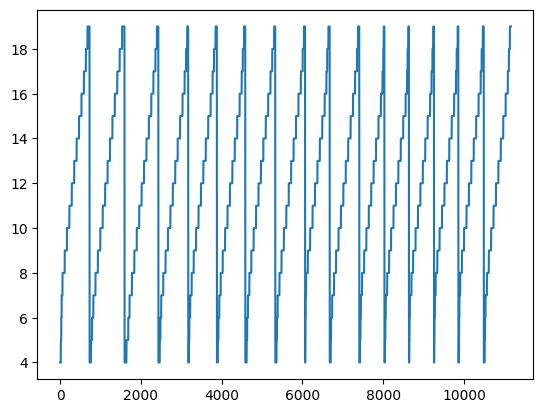

In [128]:
h = [t.tz_convert('America/Montreal').hour for t in data.timestamp]
plt.plot(h)

<BarContainer object of 24 artists>

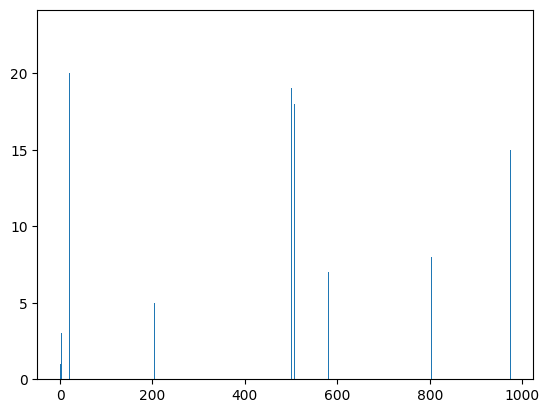

In [135]:
bins = np.arange(0, 24, 1)
for val in h:
    bins[val] += 1


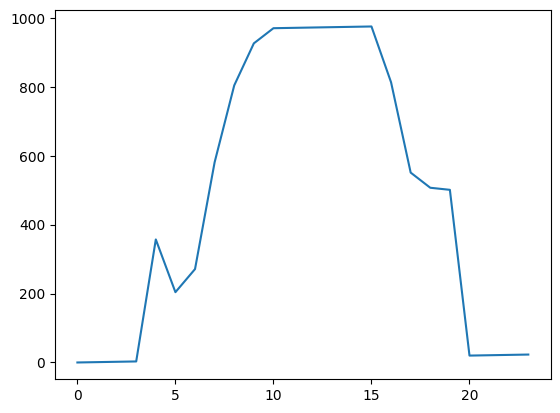

In [139]:
plt.plot(bins)

In [120]:
data.timestamp

0       2023-11-01 08:01:00+00:00
1       2023-11-01 08:07:00+00:00
2       2023-11-01 08:09:00+00:00
3       2023-11-01 08:11:00+00:00
4       2023-11-01 08:14:00+00:00
                   ...           
11161   2023-11-11 00:51:00+00:00
11162   2023-11-11 00:52:00+00:00
11163   2023-11-11 00:53:00+00:00
11164   2023-11-11 00:58:00+00:00
11165   2023-11-11 00:59:00+00:00
Name: timestamp, Length: 11166, dtype: datetime64[ns, UTC]

In [118]:
data.timestamp

0       2023-11-01 08:01:00+00:00
1       2023-11-01 08:07:00+00:00
2       2023-11-01 08:09:00+00:00
3       2023-11-01 08:11:00+00:00
4       2023-11-01 08:14:00+00:00
                   ...           
11161   2023-11-11 00:51:00+00:00
11162   2023-11-11 00:52:00+00:00
11163   2023-11-11 00:53:00+00:00
11164   2023-11-11 00:58:00+00:00
11165   2023-11-11 00:59:00+00:00
Name: timestamp, Length: 11166, dtype: datetime64[ns, UTC]

In [140]:
data.reset_index(inplace=True)

In [141]:
data.groupby("symbol").agg({"timestamp": "max"}).min().values[0] - np.timedelta64(20, 'D')

numpy.datetime64('2023-10-22T00:59:00.000000000')

In [144]:
pd.Timestamp.now() > data.groupby("symbol").agg({"timestamp": "max"}).min().values[0] - pd.Timedelta(30, "seconds")

True

In [72]:
# timestamp of now
pd.Timestamp.now()

Timestamp('2023-11-21 17:37:35.325615')